In [4]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
flights <- read.csv("../../../data/flights.csv")
nrow(flights) ### n = 5.8M records

[1] 5819079

In [5]:
head(flights, n = 5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,⋯,408,-22,0,0,,NA,NA,NA,NA,NA
2,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,⋯,741,-9,0,0,,NA,NA,NA,NA,NA
3,2015,1,1,4,US,840,N171US,SFO,CLT,20,⋯,811,5,0,0,,NA,NA,NA,NA,NA
4,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,⋯,756,-9,0,0,,NA,NA,NA,NA,NA
5,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,⋯,259,-21,0,0,,NA,NA,NA,NA,NA


In [6]:
# extract list of 19 airports of interest 
airport_list <- c("ATL", "DFW", "DEN", "ORD", "LAX", "CLT", "MCO", "LAS", "PHX", "MIA", "JFK", "SFO", "SEA", "EWR", "IAH", "BOS", "MSP", "DTW", "FLL")

# recode five-digit airport codes used in the month of October (cf. "INSTRUCTIONS" file)
airport_codes <- c("10397", "11298", "11292", "13930", "12892", "11057", "13204", "12889", "14107", "13303", "12478", "14771", "14747", "11618", "12266", "10721", "13487", "11433", "11697")

names(airport_list) <- airport_codes

flights <- flights %>%
  mutate(ORIGIN_AIRPORT = recode(ORIGIN_AIRPORT, !!!airport_list))

# extract records corresponding to the above 19 airports only (roughly 50% of all records) 
flights_major_ap <- flights %>% 
    filter(ORIGIN_AIRPORT %in% airport_list) 

In [42]:
# compute the daily fractions of cancelled flights for each of the 19 airports
agg <- flights_major_ap %>%
  group_by(ORIGIN_AIRPORT, MONTH, DAY) %>%
  summarize(CANCELLED = mean(CANCELLED, na.rm = TRUE), .groups = "drop")

# re-arrange in a matrix with rows corresponding to days and columns corresponding to airports
dat <- agg %>%
  pivot_wider(
    names_from = ORIGIN_AIRPORT, 
    values_from = CANCELLED
  ) %>% select(-c("MONTH", "DAY"))

In [55]:
head(dat)

ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,MCO,MIA,MSP,ORD,PHX,SEA,SFO
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.002702703,0.004237288,0.003558719,0.054365733,0.21772152,0.004629630,0.00000000,0.008547009,0.027459954,0.003636364,0.000000000,0.005395683,0.003095975,0.008928571,0.004464286,0.011560694,0.009433962,0.000000000,0.004683841
0.003838772,0.000000000,0.003095975,0.037993921,0.07416564,0.003333333,0.00000000,0.000000000,0.025590551,0.000000000,0.002564103,0.004687500,0.002785515,0.000000000,0.013157895,0.007389163,0.000000000,0.009316770,0.002028398
0.010548523,0.012820513,0.018867925,0.056198347,0.03957784,0.018050542,0.01865672,0.008032129,0.009009009,0.007042254,0.010840108,0.005217391,0.013888889,0.016806723,0.000000000,0.048846676,0.004329004,0.003344482,0.009216590
0.004897160,0.000000000,0.003086420,0.021705426,0.03132832,0.030201342,0.08532423,0.000000000,0.004166667,0.016611296,0.002577320,0.006504065,0.002816901,0.012765957,0.026229508,0.126422250,0.008403361,0.003225806,0.010799136
0.004970179,0.003278689,0.000000000,0.017214397,0.04030227,0.032934132,0.00000000,0.004184100,0.000000000,0.003367003,0.000000000,0.009646302,0.002923977,0.008695652,0.033670034,0.139334155,0.006479482,0.003333333,0.023012552
0.007306889,0.029801325,0.017543860,0.003546099,0.01759134,0.021538462,0.05263158,0.008968610,0.000000000,0.018867925,0.005479452,0.007246377,0.009493671,0.009569378,0.020477816,0.042416452,0.002604167,0.000000000,0.014598540


In [63]:
cor(dat)

,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,MCO,MIA,MSP,ORD,PHX,SEA,SFO
ATL,1.0000000,0.2654978,0.5173106,0.2062640,0.2712668,0.3675711,0.3453631,0.4292793,0.1937877,0.3098662,0.3702750,0.3194721,0.4848914,0.4528638,0.3914028,0.1947031,0.3118652,0.2523455,0.2032304
BOS,0.2654978,1.0000000,0.3938111,0.1404104,0.0671133,0.5203529,0.8274426,0.7056297,0.1533075,0.8696464,0.2550252,0.4170503,0.7088405,0.6230498,0.5247689,0.2644031,0.1816674,0.2944983,0.2798087
CLT,0.5173106,0.3938111,1.0000000,0.2004041,0.1797115,0.4819441,0.4882117,0.5343925,0.2423908,0.4448105,0.3568395,0.4291671,0.5880373,0.5592527,0.4517194,0.2833215,0.3446165,0.2750833,0.2358358
DEN,0.2062640,0.1404104,0.2004041,1.0000000,0.1777108,0.2886472,0.1983264,0.2454532,0.2343780,0.1660750,0.4306599,0.3523204,0.3051870,0.2798966,0.4037789,0.2106524,0.3969432,0.3936422,0.1553343
DFW,0.2712668,0.0671133,0.1797115,0.1777108,1.0000000,0.2033438,0.1517871,0.2679991,0.3890641,0.1242683,0.4285433,0.2505723,0.2792727,0.3392489,0.3145988,0.1116849,0.3064448,0.3320689,0.1125066
DTW,0.3675711,0.5203529,0.4819441,0.2886472,0.2033438,1.0000000,0.5851731,0.6456832,0.2478973,0.5104400,0.5700703,0.6171647,0.7357618,0.6969683,0.8408960,0.8126130,0.6828888,0.5514522,0.3684725
EWR,0.3453631,0.8274426,0.4882117,0.1983264,0.1517871,0.5851731,1.0000000,0.8382651,0.2669528,0.9264602,0.3852554,0.5453063,0.8419731,0.7972408,0.6260378,0.2840946,0.2868446,0.3942284,0.3566476
FLL,0.4292793,0.7056297,0.5343925,0.2454532,0.2679991,0.6456832,0.8382651,1.0000000,0.3182177,0.8409813,0.5453796,0.6743361,0.9213691,0.8587231,0.6806809,0.3497074,0.4676089,0.4984065,0.4259817
IAH,0.1937877,0.1533075,0.2423908,0.2343780,0.3890641,0.2478973,0.2669528,0.3182177,1.0000000,0.2047844,0.4030398,0.3305523,0.3168433,0.3497623,0.3439718,0.1587537,0.3116620,0.3112051,0.1911439
JFK,0.3098662,0.8696464,0.4448105,0.1660750,0.1242683,0.5104400,0.9264602,0.8409813,0.2047844,1.0000000,0.3307697,0.5213431,0.8343212,0.7769233,0.5474008,0.2072358,0.2495357,0.3473405,0.3421967


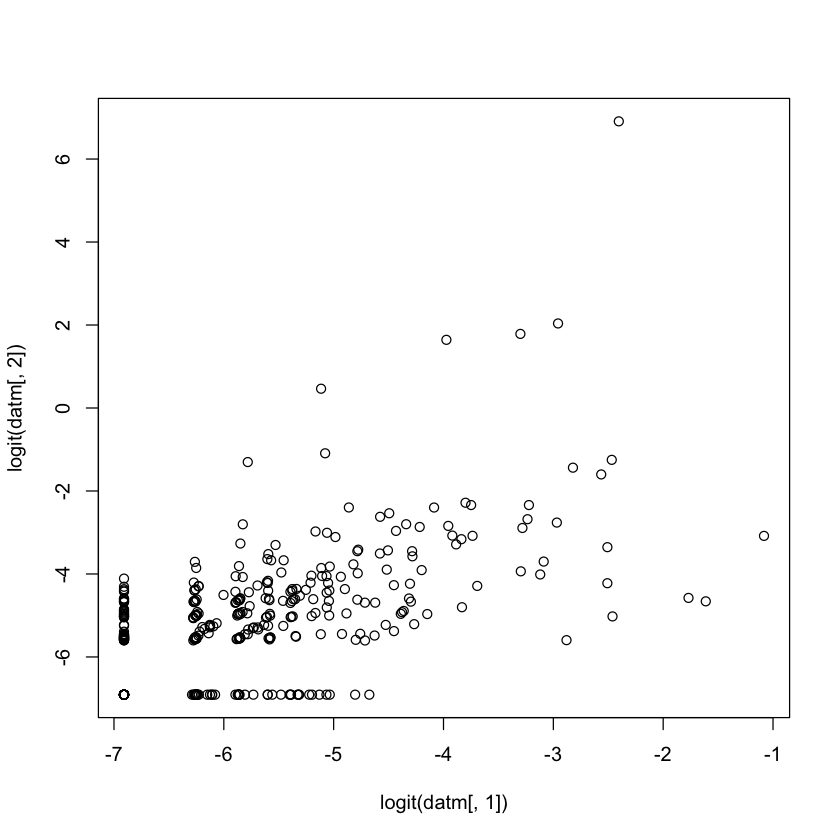

In [61]:
### logit transformation for improved normality

datm <- as.matrix(dat)
logit <- function(p) log((p + 0.001)/(1-p + 0.001))

plot(logit(datm[,1]), logit(datm[,2]))

# divide into blocks of size 13
blocklength <- 13
nblocks <- floor(nrow(dat)/blocklength)
blockindex <- numeric(nrow(dat))
blockindex[1:(nblocks * blocklength)] <- rep(1:nblocks, each = blocklength)
blockindex[(nblocks * blocklength):nrow(dat)] <- nblocks
#table(blockindex) # 28 blocks of length 13 -- 14 max

# data set consisting of 13-day averages
logit_data_avg <- dat %>%
  mutate(blockindex = blockindex) %>%
  group_by(blockindex) %>%
  summarize(across(everything(), ~ mean(logit(.x), na.rm = TRUE))) %>%
  select(-c("blockindex")) %>%
  as.matrix()

In [54]:
head(logit_data_avg)

ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,MCO,MIA,MSP,ORD,PHX,SEA,SFO
-4.977827,-4.963174,-4.957581,-4.090657,-3.664867,-3.974939,-4.517385,-5.522498,-5.284099,-4.892593,-5.200510,-4.673070,-4.907755,-4.641557,-4.569270,-2.828094,-5.553633,-5.646013,-4.200998
-5.677499,-4.680921,-5.788626,-5.535775,-5.516696,-4.984622,-4.879898,-5.424522,-6.062247,-5.155939,-5.779387,-4.987829,-5.199980,-6.058980,-5.562018,-4.653386,-5.760234,-6.061040,-4.219359
-5.080784,-2.411493,-4.920954,-4.496296,-4.473627,-4.028074,-3.320516,-4.419889,-4.995139,-3.786852,-4.641969,-3.832431,-4.382426,-4.036485,-4.568410,-3.243517,-4.605134,-4.523612,-3.223181
-4.581266,-2.943146,-4.260859,-4.778420,-4.736603,-3.869128,-3.573737,-4.330384,-5.020743,-3.906548,-4.996466,-4.427182,-4.143561,-4.451017,-4.702199,-3.936370,-5.467355,-5.799193,-4.428901
-3.347411,-3.285917,-3.458231,-3.519356,-1.319031,-3.343612,-2.781355,-3.442578,-3.171504,-3.502713,-3.783558,-3.880875,-3.440106,-3.284177,-3.897712,-3.054627,-4.186779,-4.855396,-3.990960
-5.664712,-5.148300,-6.026177,-6.279529,-4.934594,-6.165822,-5.817874,-5.845002,-5.727830,-4.676143,-5.714517,-4.949749,-5.949293,-5.941848,-6.146313,-5.565612,-5.977608,-6.676986,-4.793901


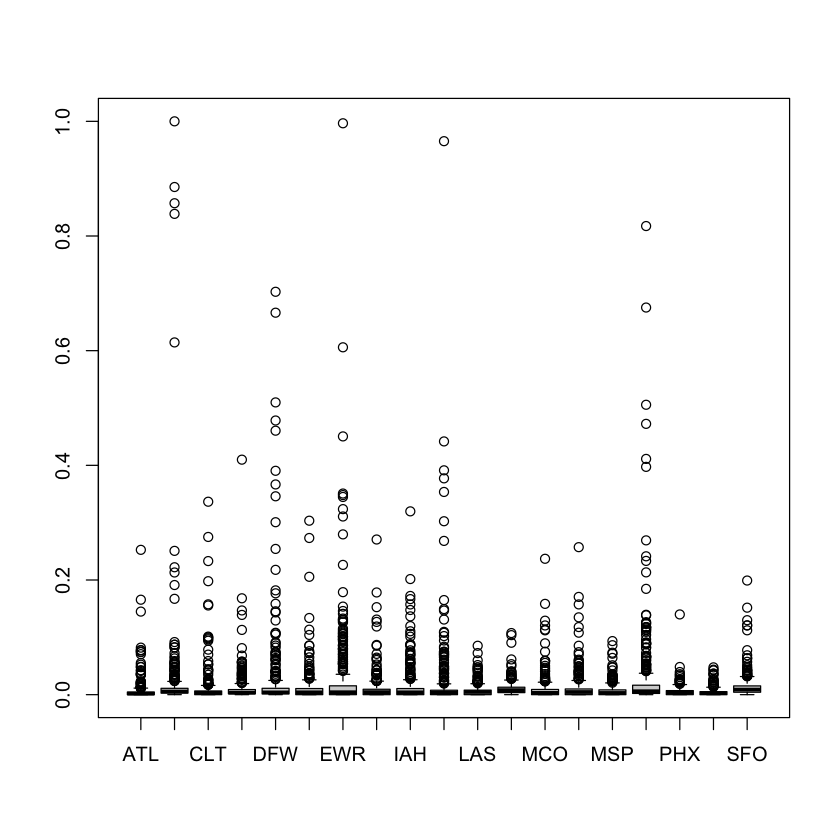

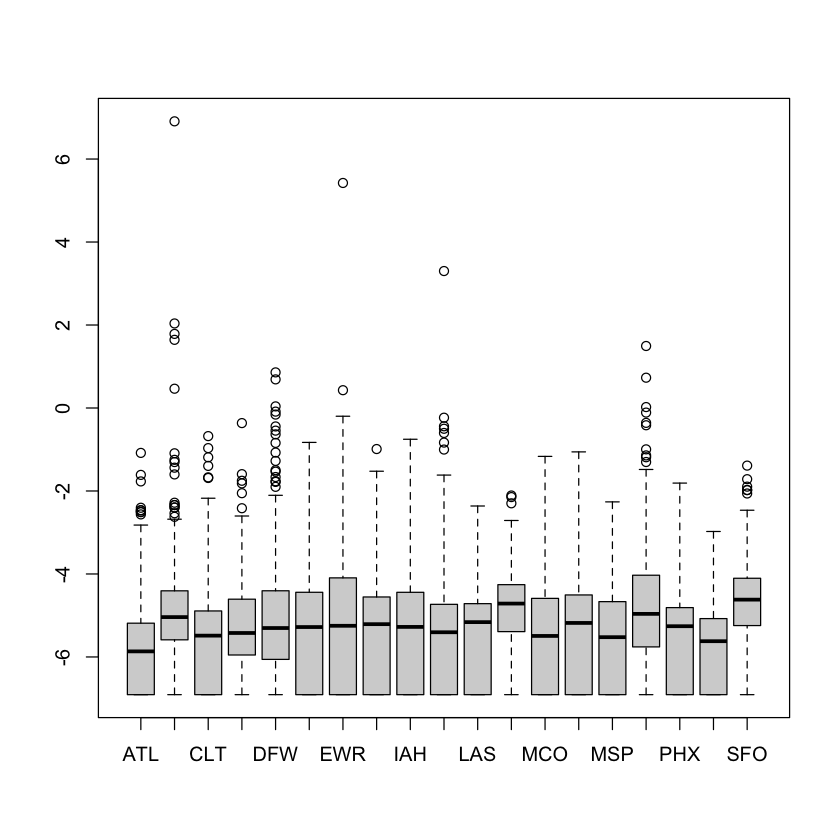

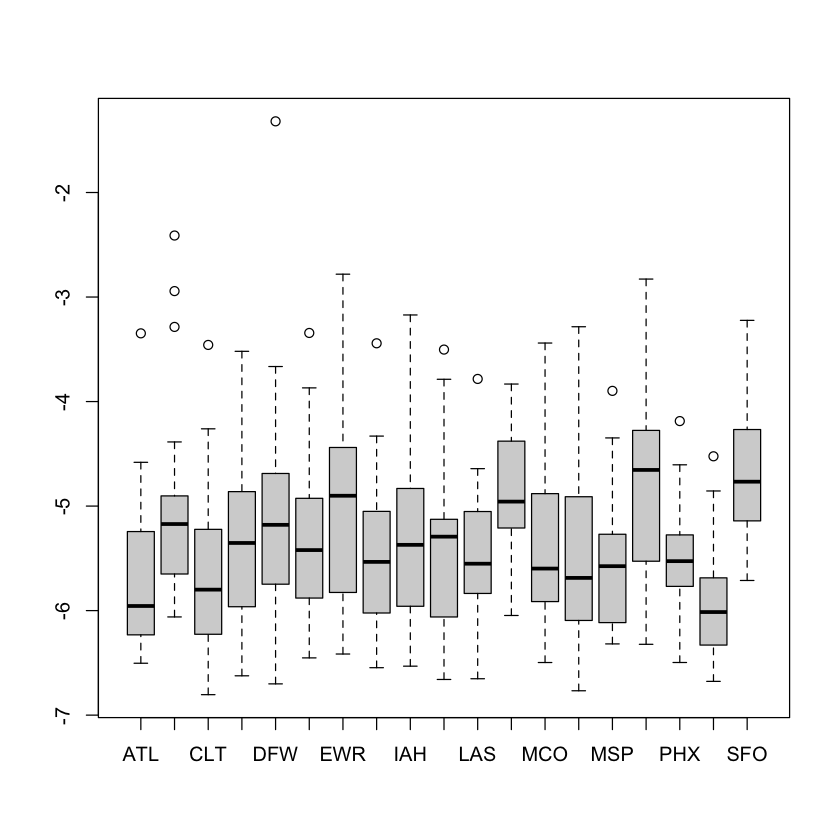

In [56]:
boxplot(dat)
boxplot(logit(dat))
boxplot(logit_data_avg)

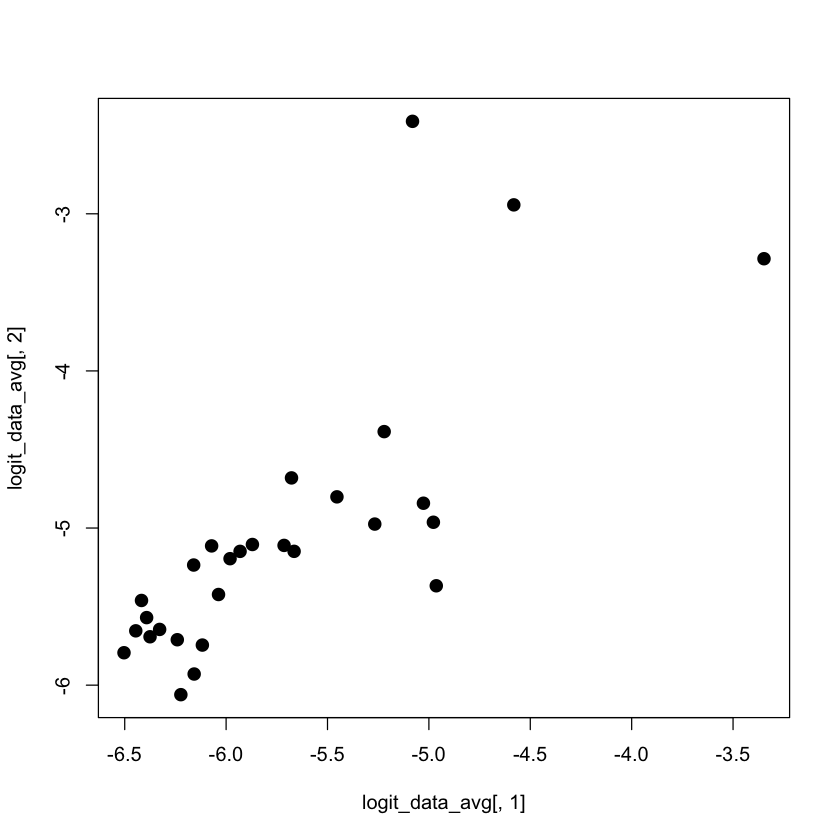

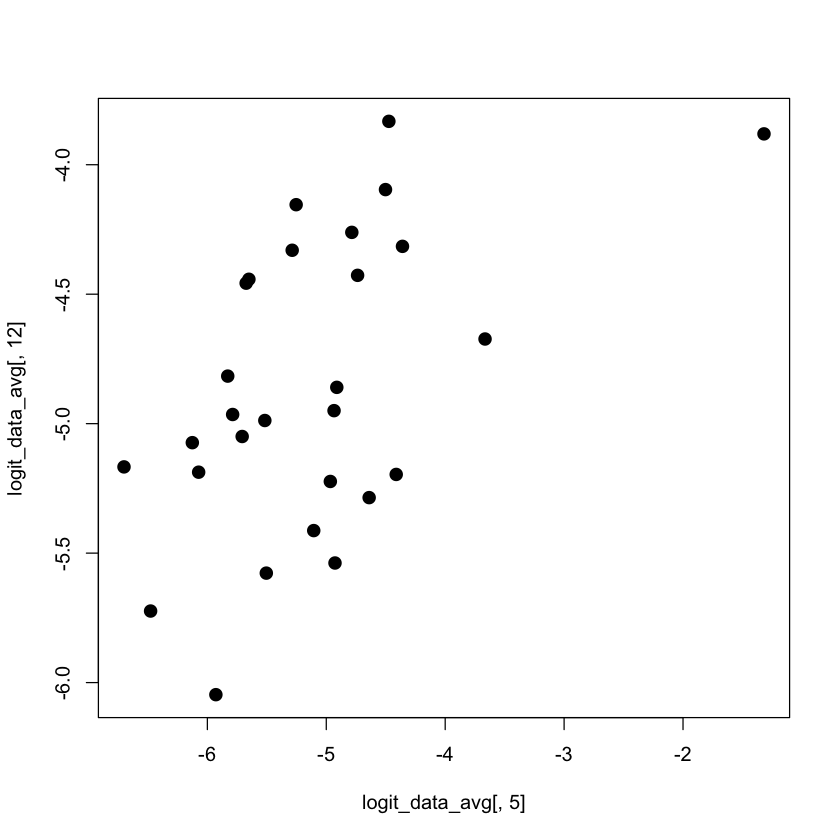

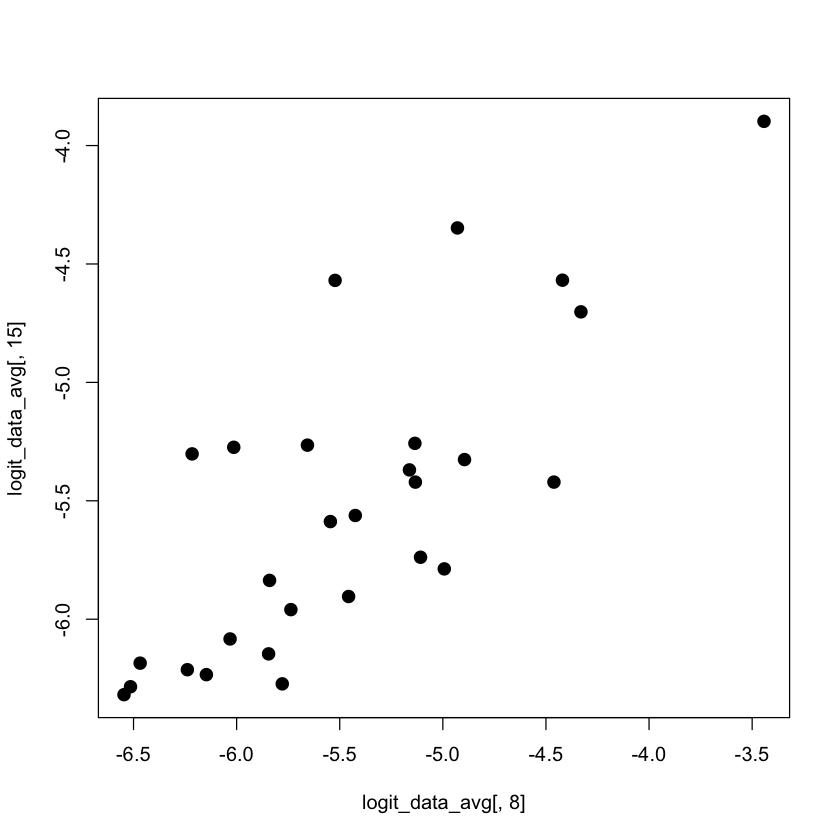

In [58]:
plot(logit_data_avg[,1], logit_data_avg[,2], pch = 16, cex = 1.5)
plot(logit_data_avg[,5], logit_data_avg[,12], pch = 16, cex = 1.5)
plot(logit_data_avg[,8], logit_data_avg[,15], pch = 16, cex = 1.5)